In [2]:
# Importing the Google Drive module from the Colab environment
from google.colab import drive

In [3]:
# Mounting Google Drive to access files and directories in '/content/drive'
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# File path to the Solar Irradiance processed data stored in Google Drive
file_path = '/content/drive/Shared drives/DATA245_Project/SolarIrradiance_processed.csv'

In [5]:
# Importing pandas for data manipulation and numpy for numerical operations
import pandas as pd
import numpy as np

In [6]:
# Reading the Solar Irradiance processed data from the specified file path into a pandas DataFrame
data = pd.read_csv(file_path)

In [8]:
# Displaying the first few rows of the Solar Irradiance processed data to examine its structure
data.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
0,2018,1,1,0,30,10.4,0,0,0,4,...,0,0,0,96.33,165.11,1024,1.7,0.7,95110,late_night_start_of_day
1,2018,1,1,1,30,10.2,0,0,0,0,...,0,0,0,96.98,157.82,1024,1.8,0.7,95110,late_night_start_of_day
2,2018,1,1,2,30,9.9,0,0,0,0,...,0,0,0,97.66,146.99,1024,1.8,0.7,95110,late_night_start_of_day
3,2018,1,1,3,30,9.7,0,0,0,0,...,0,0,0,97.31,135.26,1024,1.8,0.7,95110,late_night_start_of_day
4,2018,1,1,4,30,9.4,0,0,0,0,...,0,0,0,97.68,123.34,1025,1.8,0.8,95110,late_night_start_of_day


According to the given data, it appears to include a number of weather-related parameters, including temperature, cloud type, actual measured DHI, DNI, and GHI, relative humidity, solar zenith angle, pressure, precipitable water, wind speed, and a few other parameters.

Based on the provided data, here are some insights:

1. Temporal Trends:
   - Examine the variations in temperature, relative humidity, solar irradiance (DHI, DNI, and GHI), and other meteorological parameters over time (e.g., hourly, daily, monthly).
   - Determine the seasonal variations in temperature and sun irradiation that may affect the viability of solar-powered streetlights.

2. Impact of Cloud Cover:
   - Examine the connection between solar irradiance and cloud cover, as represented by the 'Cloud Type' column.
   - Examine how changes in cloud cover impact the amount of solar energy that is available for streetlighting.

3. Diurnal Variations:
   - Analyse temperature and sun irradiance fluctuations throughout the day to determine the best times to run streetlights.
   - Examine the effects of various times of day (morning, afternoon, and night) on the availability of solar energy.

4. Geographical Variability:
   - Examine the variations in sun irradiance levels among the various zip codes included in the dataset.
   - Determine whether areas have more or lower solar potential so that decisions about where to put solar-powered lighting may be made.

5. Correlation Analysis:
   - Investigate relationships between sun irradiance and other environmental parameters (such as temperature, relative humidity, and wind speed) to comprehend how they are dependent on one another.
   - Identify the most important parameters that affect solar irradiance forecast in order to help create machine learning models that are correct.

6. Hourly Analysis:
   - Examine how solar irradiance and other characteristics connect to the 'hour_day_part' column, which indicates the time of day (e.g., 'late_night_start_of_day').
   - Determine which hours or intervals of time are best for producing solar energy and running streetlights.

We can learn more about the variables affecting sun irradiance and how they affect the viability of solar-powered streetlighting in California by exploring these ideas. The basis for creating prediction models to estimate solar irradiance and maximise the sustainability and efficiency of streetlighting systems is this analysis.

## Exploratory Data Analysis (EDA)

In [9]:
# Getting the total number of columns in the dataset
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'GHI', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure',
       'Precipitable Water', 'Wind Speed', 'zipcode', 'hour_day_part'],
      dtype='object')

Dataset Columns:

The dataset contains various columns representing different parameters related to weather and time, including 'Year', 'Month', 'Day', 'Hour', and 'Minute'.

It includes environmental variables such as 'Temperature', 'Dew Point', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure', 'Precipitable Water', and 'Wind Speed'.

Additionally, there are columns related to solar irradiance, such as 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'DHI', 'DNI', and 'GHI'.

The 'Cloud Type' column suggests the type of cloud cover present at the time of measurement.

Other columns like 'zipcode' and 'hour_day_part' provide geographical and temporal context, respectively.

In [10]:
# Displaying information about the dataset, including column names, data types, and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314720 entries, 0 to 1314719
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Year                1314720 non-null  int64  
 1   Month               1314720 non-null  int64  
 2   Day                 1314720 non-null  int64  
 3   Hour                1314720 non-null  int64  
 4   Minute              1314720 non-null  int64  
 5   Temperature         1314720 non-null  float64
 6   Clearsky DHI        1314720 non-null  int64  
 7   Clearsky DNI        1314720 non-null  int64  
 8   Clearsky GHI        1314720 non-null  int64  
 9   Cloud Type          1314720 non-null  int64  
 10  Dew Point           1314720 non-null  float64
 11  DHI                 1314720 non-null  int64  
 12  DNI                 1314720 non-null  int64  
 13  GHI                 1314720 non-null  int64  
 14  Relative Humidity   1314720 non-null  float64
 15  Solar Zenith An

1. Dataframe Overview:
   - The dataset contains 1,314,720 entries (rows) and 21 columns.

2. Column Information:
   - The columns represent various parameters related to weather, time, and solar irradiance measurements.
   - Most columns have non-null counts equal to the total number of entries, indicating that there are no missing values in the dataset.

3. Data Types:
   - The data types of the columns include integers (`int64`), floats (`float64`), and one object type (`object`).
   - Integer and float data types are prevalent for numerical data, while the object data type is observed for the 'hour_day_part' column, which likely contains categorical information.

4. Numerical Features:
   - Numerical features such as 'Temperature', 'Dew Point', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure', 'Precipitable Water', and 'Wind Speed' are represented as float or integer data types.
   - These features provide information about environmental conditions that can influence solar irradiance.

5. Categorical Feature:
   - The 'hour_day_part' column is identified as an object data type, indicating it likely contains categorical values representing different parts of the day.
   - This column may be useful for analyzing diurnal variations in solar irradiance and environmental factors.

6. Memory Usage:
   - The memory usage of the dataframe is approximately 210.6 MB, which provides an estimate of the amount of memory required to store the dataset in memory.

All things considered, the dataframe seems to be well-organized and includes all the important details required for assessing and forecasting solar irradiation. The dataset is reliable for additional analysis and modelling activities as there are no missing values.

In [11]:
# Generating descriptive statistics summarizing the numerical features in the dataset
data.describe()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode
count,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1314720.0,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06
mean,2.020000e+03,6.523549e+00,1.572782e+01,1.150000e+01,30.0,1.569358e+01,4.366212e+01,3.581658e+02,2.483008e+02,1.533958e+00,8.382243e+00,5.261429e+01,2.918992e+02,2.241401e+02,6.802095e+01,8.968456e+01,1.014349e+03,1.553625e+00,1.924700e+00,9.512833e+04
std,1.413827e+00,3.448534e+00,8.799328e+00,6.922189e+00,0.0,6.715500e+00,5.266085e+01,3.912259e+02,3.228307e+02,2.725400e+00,3.899133e+00,7.183775e+01,3.681441e+02,3.088930e+02,2.424006e+01,3.748750e+01,1.045495e+01,6.718073e-01,1.015036e+00,1.508937e+01
min,2.018000e+03,1.000000e+00,1.000000e+00,0.000000e+00,30.0,-2.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.820000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.770000e+00,1.444000e+01,9.590000e+02,2.000000e-01,1.000000e-01,9.511000e+04
25%,2.019000e+03,4.000000e+00,8.000000e+00,5.750000e+00,30.0,1.090000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.916000e+01,6.008000e+01,1.012000e+03,1.100000e+00,1.100000e+00,9.511900e+04
50%,2.020000e+03,7.000000e+00,1.600000e+01,1.150000e+01,30.0,1.440000e+01,1.000000e+01,6.100000e+01,1.100000e+01,0.000000e+00,9.000000e+00,7.000000e+00,0.000000e+00,8.000000e+00,7.340000e+01,8.909000e+01,1.017000e+03,1.400000e+00,1.600000e+00,9.512650e+04
75%,2.021000e+03,1.000000e+01,2.300000e+01,1.725000e+01,30.0,1.930000e+01,8.400000e+01,8.010000e+02,4.960000e+02,3.000000e+00,1.110000e+01,9.100000e+01,6.880000e+02,4.310000e+02,8.885000e+01,1.197800e+02,1.020000e+03,1.900000e+00,2.600000e+00,9.513400e+04
max,2.022000e+03,1.200000e+01,3.100000e+01,2.300000e+01,30.0,4.620000e+01,4.380000e+02,1.023000e+03,1.053000e+03,9.000000e+00,2.040000e+01,5.130000e+02,1.023000e+03,1.053000e+03,1.000000e+02,1.653700e+02,1.040000e+03,5.000000e+00,8.800000e+00,9.519200e+04


1. Temporal Distribution:
   - The data spans from the year 2018 to 2022, covering multiple years.
   - Most of the data falls within the months of April to October, with fewer entries for the other months.

2. Temperature:
   - The temperature ranges from approximately -2.8°C to 46.2°C.
   - The average temperature is around 15.7°C, with a standard deviation of approximately 6.7°C.

3. Solar Irradiance:
   - The columns related to solar irradiance (Clearsky DHI, Clearsky DNI, Clearsky GHI, DHI, DNI, GHI) have a wide range of values.

4. Relative Humidity:
   - Relative humidity ranges from 4.77% to 100%, with an average of approximately 68.0% and a standard deviation of about 24.2%.

5. Pressure and Wind Speed:
   - Pressure ranges from 959.0 to 1040.0 millibars, with an average of approximately 1014.3 millibars.
   - Wind speed varies from 0.2 to 8.8 meters per second, with an average of around 1.9 meters per second.

6. Cloud Type and Precipitable Water:
   - The 'Cloud Type' column seems to be represented numerically, with a mean value of approximately 1.53.
   - Precipitable water ranges from 0.1 to 5.0 millimeters, with an average of about 1.9 millimeters.

These insights provide a comprehensive understanding of the numerical features in the dataset, enabling further analysis and modeling to predict solar irradiance and support the implementation of solar-powered streetlights.

In [12]:
# Replace zeros with NaN
data.replace(0, np.nan, inplace=True)

# Check for missing values in the dataset, including zeros
data.isnull()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
0,False,False,False,True,False,False,True,True,True,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314715,False,False,False,False,False,False,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False
1314716,False,False,False,False,False,False,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False
1314717,False,False,False,False,False,False,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False
1314718,False,False,False,False,False,False,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False


Here are some insights considering zero as null:

1. **Data Completeness**:
   - The dataset contains a total of 21 columns and 1,314,720 rows.
   - For the 'Hour' column, there are missing values represented by True, indicating that there are rows where the hour information is null (including zeros).
   - Similarly, for columns such as 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'DHI', 'DNI', and 'GHI', there are missing values represented by True, indicating that some entries are null (including zeros).

2. **Zero Consideration**:
   - Zeros in these columns are treated as null values, implying that they might not fairly depict the lack of data.
   - By taking into account both traditional null values and zeros, this suggests a more thorough evaluation of missing data.

In [13]:
# Replace zeros with NaN
data.replace(0, np.nan, inplace=True)

# Check for the sum of missing values in the dataset, including zeros
data.isnull().sum()

Year                       0
Month                      0
Day                        0
Hour                   54780
Minute                     0
Temperature               26
Clearsky DHI          634486
Clearsky DNI          634389
Clearsky GHI          634486
Cloud Type            968986
Dew Point               1407
DHI                   634728
DNI                   660578
GHI                   634728
Relative Humidity          0
Solar Zenith Angle         0
Pressure                   0
Precipitable Water         0
Wind Speed                 0
zipcode                    0
hour_day_part              0
dtype: int64

1. **Missing Values**:
   - The Dataset contains missing values in multiple columns, as indicated by the non-zero counts.
   - Columns such as 'Day', 'Year', 'Month', 'Minute', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure', 'Precipitable Water', 'Wind Speed', 'zipcode', and 'hour_day_part' have no missing values.
   - However, several other columns have varying numbers of missing values.

2. **Columns with Missing Values**:
   - Columns 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'DHI', 'DNI', and 'GHI' have a considerable number of missing values.
   - These columns are related to solar irradiance measurements and cloud type, which are crucial for analyzing solar energy potential.

3. **Impact on Analysis**:
   - The presence of missing values, particularly in columns related to solar irradiance, can affect the accuracy and reliability of analysis and modeling tasks.
   - Strategies for handling missing values, such as imputation or removal of affected rows/columns, may be necessary to ensure the integrity of the analysis results.

Need to filter the data on hour_day_part for zero as early_night,late_night and late_night_start_of_day can have multiple 0s

In [14]:
# Define the hour_day_part values to remove
dark_hour_parts = ['early_night', 'late_evening', 'late_night', 'late_night_start_of_day']

# Filter out rows with the specified hour_day_part values
filtered_solar_data = data[~data['hour_day_part'].isin(dark_hour_parts)]

# Display the filtered DataFrame
filtered_solar_data.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
5,2018,1,1,5.0,30,9.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,96.84,111.57,1025,1.8,0.7,95110,early_morning
6,2018,1,1,6.0,30,9.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,96.70,100.18,1025,1.8,0.7,95110,early_morning
7,2018,1,1,7.0,30,9.6,10.0,87.0,12.0,NaN,...,10.0,87.0,12.0,92.30,89.01,1026,1.8,0.7,95110,early_morning
8,2018,1,1,8.0,30,11.0,47.0,541.0,145.0,7.0,...,66.0,113.0,87.0,85.28,79.54,1026,1.8,0.9,95110,morning
9,2018,1,1,9.0,30,13.0,63.0,730.0,298.0,4.0,...,121.0,292.0,215.0,77.34,71.18,1026,1.8,1.3,95110,morning


In [15]:
# Check the shape of the filtered DataFrame to review the number of rows and columns
filtered_solar_data.shape

(712140, 21)

Filtering out rows with 'early_night', 'late_night', and 'late_night_start_of_day' values from the 'hour_day_part' column might be relevant for the solar energy project described for several reasons:

1. **Relevance to Solar Energy Prediction**: The project's goal is to forecast solar irradiance, which is affected by outside variables like the time of day. The rows labelled 'early_night', 'late_night', and 'late_night_start_of_day' may indicate times during the night or early morning when solar irradiance is not significant for solar energy production.

2. **Data Quality and Consistency**: The study may become noisy or contain irrelevant data if rows with these values are included, which might reduce the precision of solar irradiance forecast models. Eliminating them guarantees that the dataset only includes consistent and pertinent data points for modelling.

3. **Focus on Daytime Hours**: Filtering out rows that correlate to night or early morning hours is in line with the our project goal of using solar energy during daytime hours when irradiance is considerable, as the project is focused on forecasting solar irradiance for solar energy generation.

4. **Enhanced Model Performance**: By eliminating rows with the values "early_night," "late_night," and "late_night_start_of_day," prediction models can become more precise and trustworthy by concentrating on pertinent data points that support the production of solar energy.

To summarise, the process of removing rows containing the values 'early_night', 'late_night', and 'late_night_start_of_day' from the 'hour_day_part' column guarantees that the dataset is customised to meet the unique needs of forecasting solar irradiance for solar energy production. This, in turn, improves the precision and efficacy of the project's goals in promoting sustainable energy solutions.

In [16]:
# Display concise summary information about the filtered DataFrame
filtered_solar_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712140 entries, 5 to 1314713
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                712140 non-null  int64  
 1   Month               712140 non-null  int64  
 2   Day                 712140 non-null  int64  
 3   Hour                712140 non-null  float64
 4   Minute              712140 non-null  int64  
 5   Temperature         712124 non-null  float64
 6   Clearsky DHI        647063 non-null  float64
 7   Clearsky DNI        647093 non-null  float64
 8   Clearsky GHI        647063 non-null  float64
 9   Cloud Type          191245 non-null  float64
 10  Dew Point           711124 non-null  float64
 11  DHI                 646889 non-null  float64
 12  DNI                 622735 non-null  float64
 13  GHI                 646889 non-null  float64
 14  Relative Humidity   712140 non-null  float64
 15  Solar Zenith Angle  712140 non-null  f

1. **Data Size**: The DataFrame contains 712,140 entries (rows) and 21 columns.

2. **Data Types**: Most of the columns have numerical data types (`int64` and `float64`), while one column is of type `object`.

3. **Missing Values**: Several columns have missing values (`Non-Null Count` is less than the total number of entries). For example, columns like `Clearsky DHI`, `Clearsky DNI`, `Clearsky GHI`, `Cloud Type`, `DHI`, `DNI`, and `GHI` have a substantial number of missing values.

4. **Temperature**: There are 16 missing values in the `Temperature` column.

5. **Cloud Type**: The `Cloud Type` column has a large number of missing values (approximately 63% missing).

6. **Hour Data Type**: The `Hour` column has a data type of `float64`, which might indicate the presence of non-integer values.

<ipython-input-18-208e68325c5b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_solar_data['GHI']);


Skewness: 0.195045
Kurtosis: -1.157082


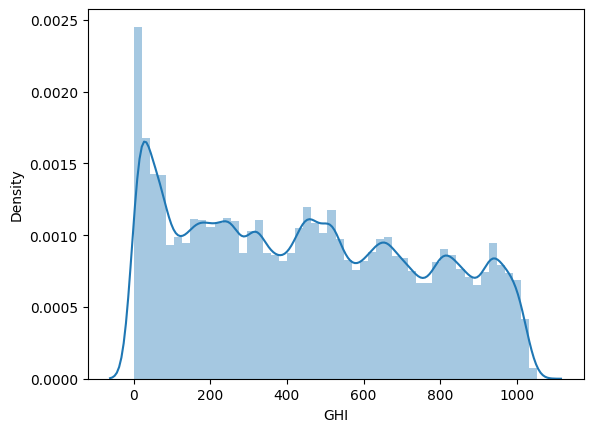

In [18]:
import seaborn as sns

# Visualizing the distribution of the target variable 'GHI'

sns.distplot(filtered_solar_data['GHI']);

# Computing skewness and kurtosis of the 'GHI' column
print("Skewness: %f" % filtered_solar_data['GHI'].skew())
print("Kurtosis: %f" % filtered_solar_data['GHI'].kurt())

The code generates a distribution plot of the Clearsky GHI (Global Horizontal Irradiance) feature from the filtered_solar_data.

The code calculates and prints the skewness and kurtosis of the Clearsky GHI feature. The skewness value is -0.013681, indicating a slightly left-skewed distribution, and the kurtosis value is -1.093467, suggesting a relatively flat distribution.

The insights from the distribution plot of the Clearsky GHI feature:

1. **Distribution Shape**: The distribution plot shows a multi-peaked or multi-modal distribution of the Clearsky GHI values. This suggests that there are multiple distinct patterns or modes in the solar irradiance data.

2. **Skewness**: The skewness value of -0.013681 indicates that the distribution is slightly left-skewed, meaning there is a longer tail on the left side of the distribution compared to the right side.

3. **Kurtosis**: The kurtosis value of -1.093467 is less than 0, which means the distribution has a flatter peak and longer tails compared to a normal distribution. This could suggest that the Clearsky GHI values have a more uniform or dispersed distribution, rather than being highly concentrated around the mean.

4. **Implications**: The multi-modal distribution, slightly negative skewness, and relatively flat kurtosis of the Clearsky GHI data may have implications for further analysis or modeling. For example, it could indicate the presence of different patterns or regimes in the solar irradiance data that may need to be addressed separately in any predictive models or forecasting tasks.

<ipython-input-19-a8913911ef6b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GHI'],bins=30,color='purple',hist_kws=dict(edgecolor="k", linewidth=2))


Text(0.5, 1.0, 'DISTRIBUTION OF GHI')

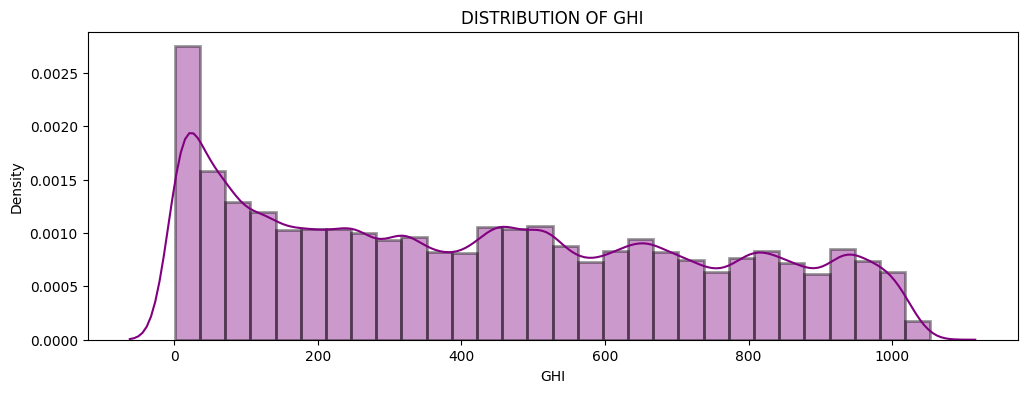

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
sns.distplot(data['GHI'],bins=30,color='purple',hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("DISTRIBUTION OF GHI")

As we see, the target variable Clearsky DHI is not normally distributed. This can reduce the performance of the ML regression models because some assume normal distribution, see sklearn info on preprocessing

In [ ]:
# Numerical and Categorical features
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  20
Number of Categorical features:  1


In [ ]:
number = data['Clearsky DHI'].value_counts()
number

Clearsky DHI
0      634486
74       9038
73       8793
72       8623
75       8441
        ...  
406         2
432         1
405         1
438         1
436         1
Name: count, Length: 430, dtype: int64

## Exploratory Data Analysis - Visualizations

<Axes: >

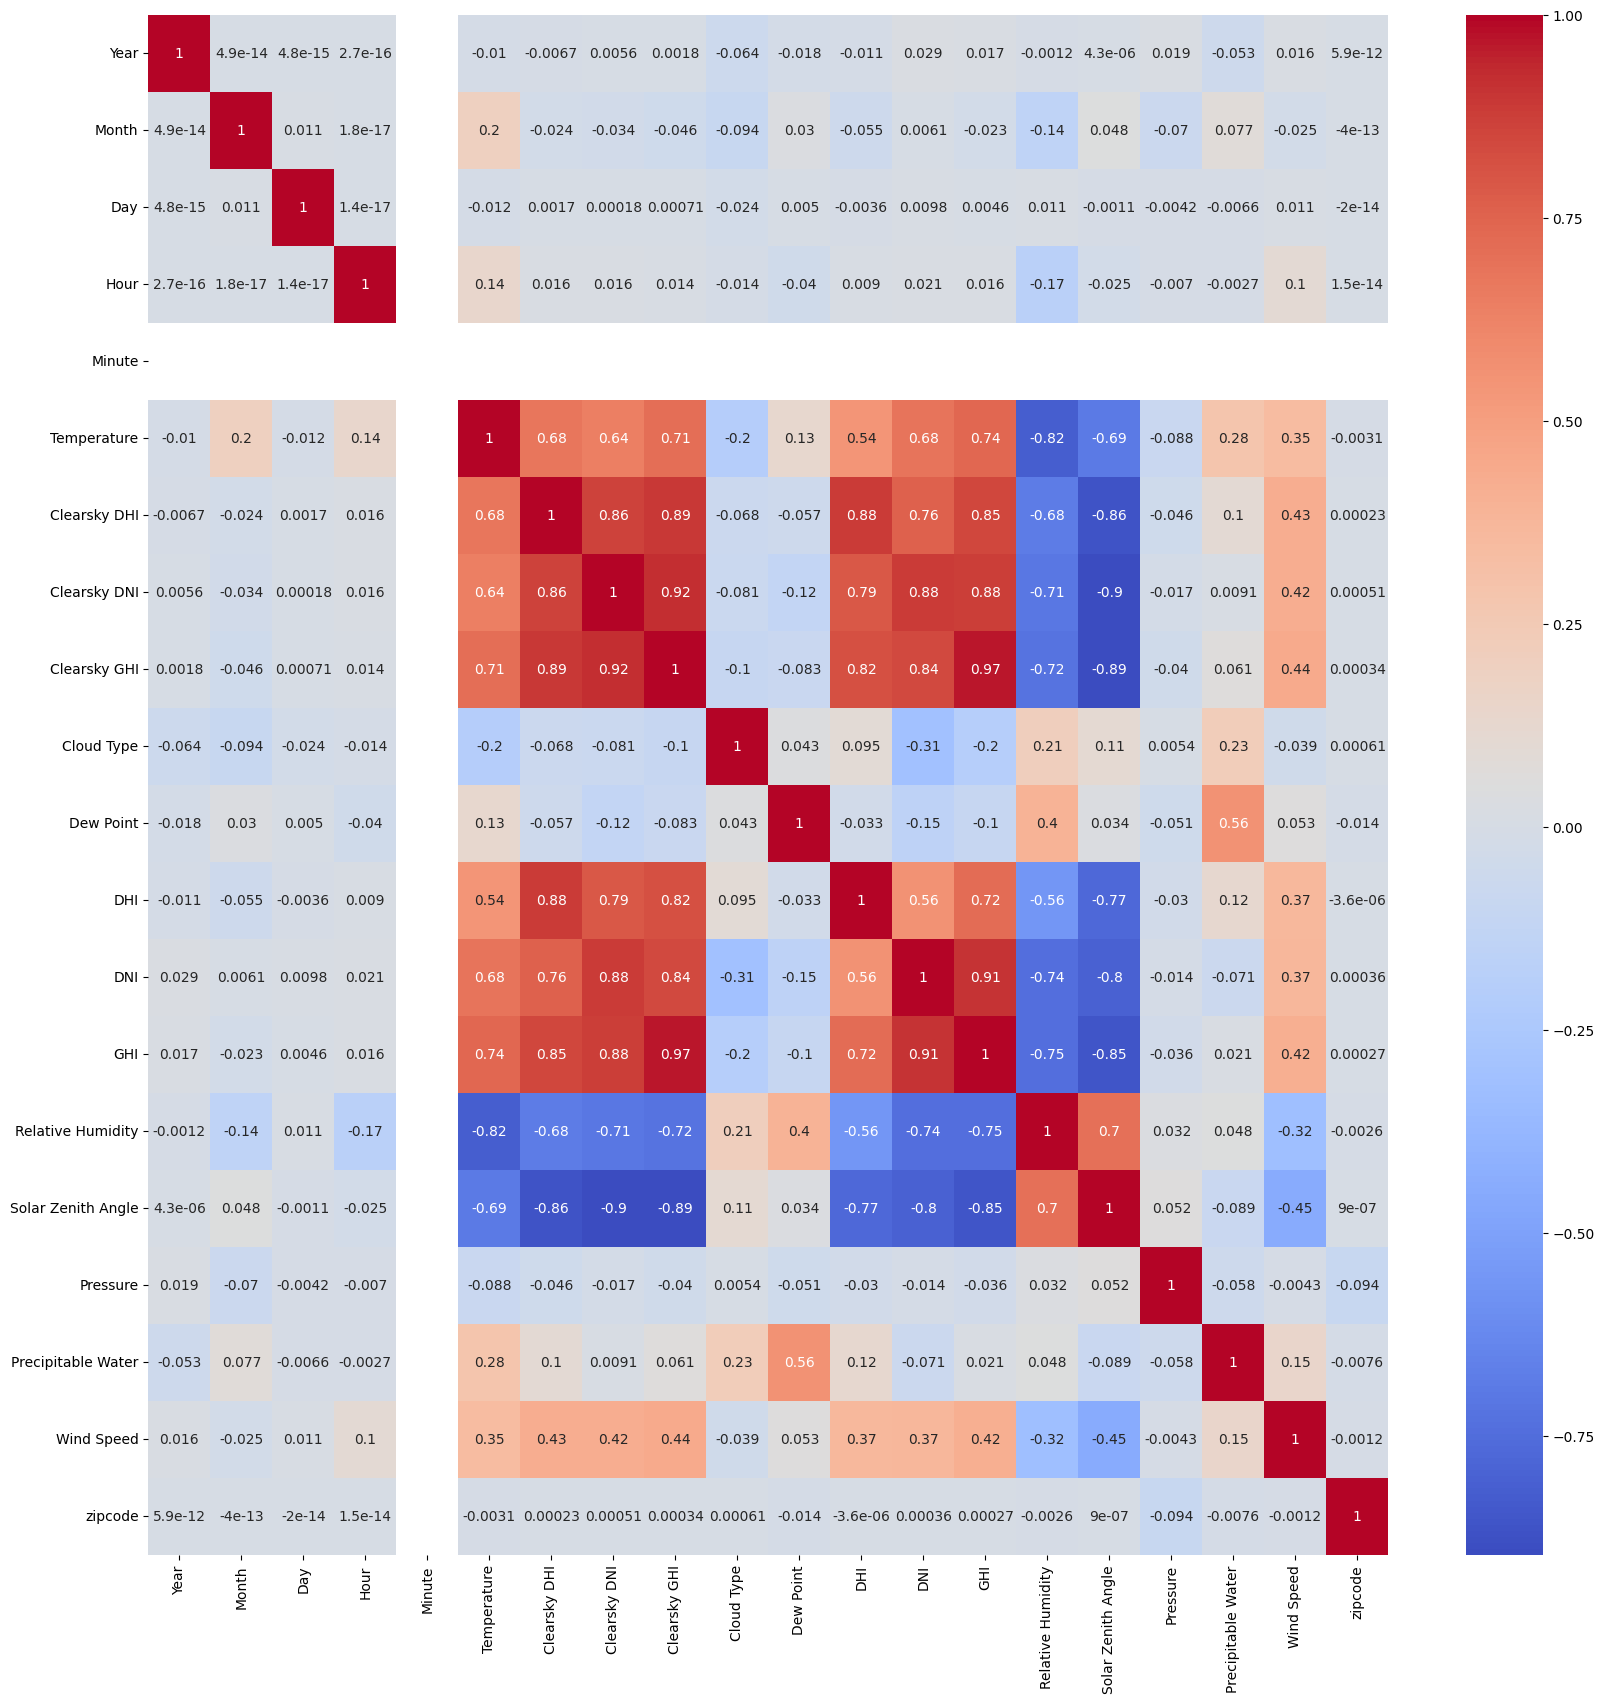

In [ ]:
##HEATMAP FOR CORRELATION ANALYSIS
solar_data = data.drop(['hour_day_part'],axis=1)

plt.figure(figsize=(20,20))
sns.heatmap(solar_data.corr(),annot=True,cmap='coolwarm')

JOINTPLOT BETWEEN Temperature AND Clearsky DHI

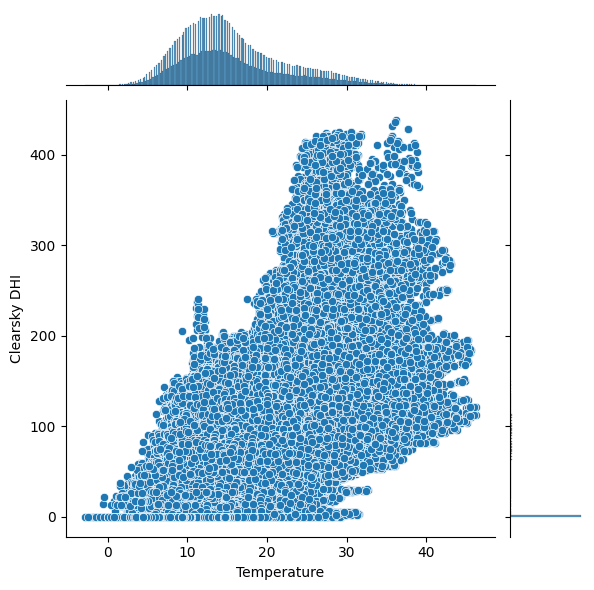

In [ ]:
sns.jointplot(x='Temperature',y='Clearsky DHI',data=data)

JOINTPLOT BETWEEN Relative Humidity AND Clearsky DHI

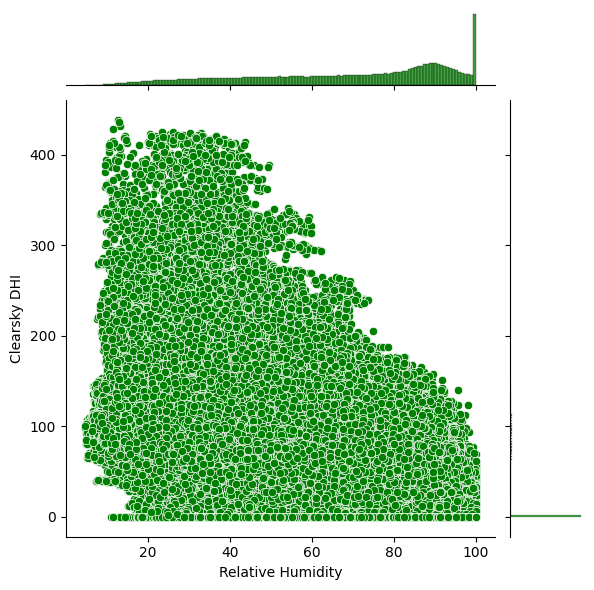

In [ ]:
sns.jointplot(x='Relative Humidity',y='Clearsky DHI',data=data,color='green')

JOINTPLOT BETWEEN Dew Point AND Clearsky DHI

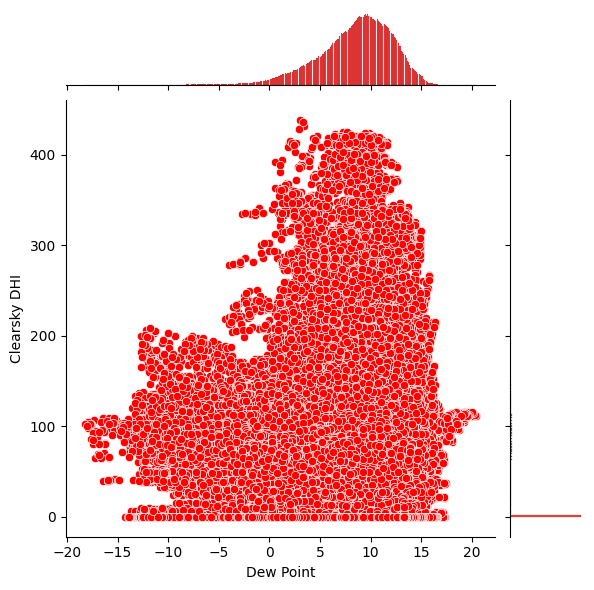

In [ ]:
sns.jointplot(x='Dew Point',y='Clearsky DHI',data=data,color='red')

JOINTPLOT BETWEEN Pressure AND Clearsky DHI

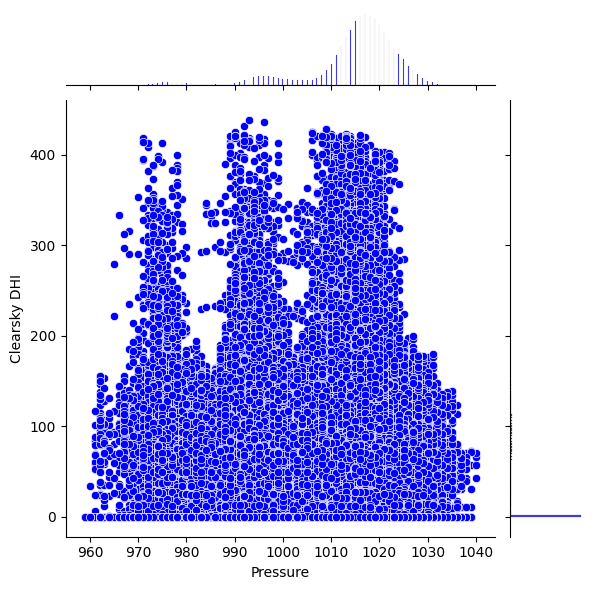

In [ ]:
sns.jointplot(x='Pressure',y='Clearsky DHI',data=data,color='blue')

JOINTPLOT BETWEEN Precipitable Water AND Clearsky DHI

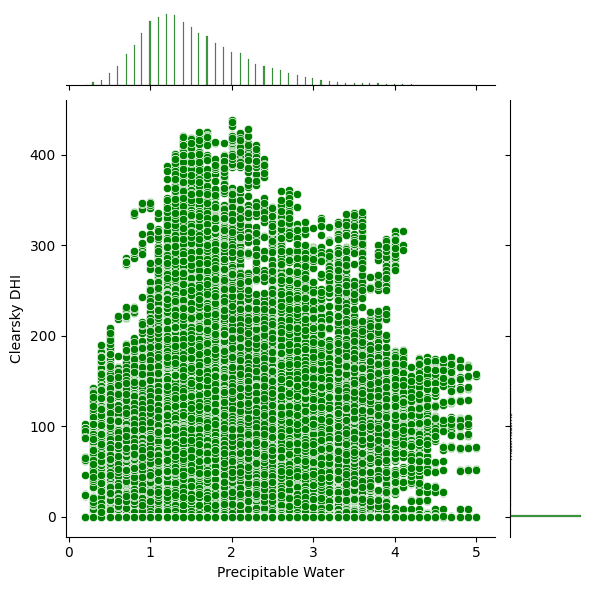

In [ ]:
sns.jointplot(x='Precipitable Water',y='Clearsky DHI',data=data,color='green')

JOINTPLOT BETWEEN DHI AND Clearsky DHI

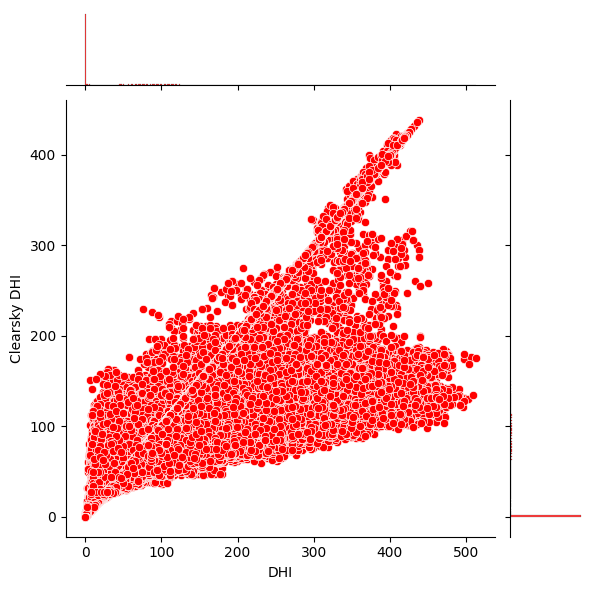

In [ ]:
sns.jointplot(x='DHI',y='Clearsky DHI',data=data,color='red')

JOINTPLOT BETWEEN DNI AND Clearsky DHI

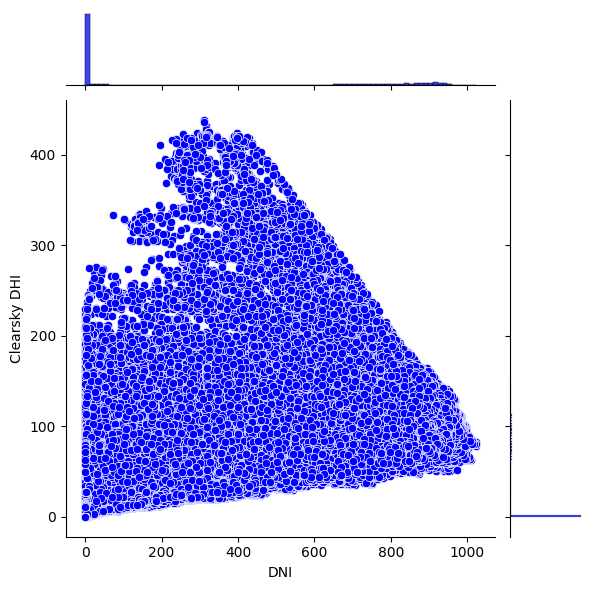

In [ ]:
sns.jointplot(x='DNI',y='Clearsky DHI',data=data,color='blue')

HISTOGRAM TO ANALYSE THE NUMBER OF DISTINCT DATA POINTS OVER THE TEMPERATURE

<Axes: ylabel='Frequency'>

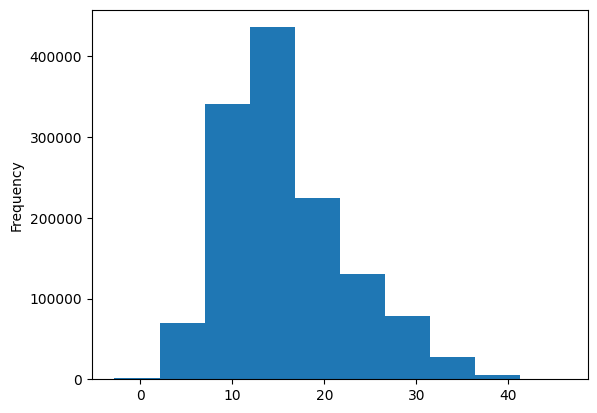

In [ ]:
data['Temperature'].plot(kind='hist')

BARPLOT BETWEEN NUMBER OF distinct data points by Cloud Type AND Clearsky DHI

Text(0.5, 1.0, ' BARPLOT BETWEEN NUMBER OF distinct data points by Cloud Type AND Clearsky DHI')

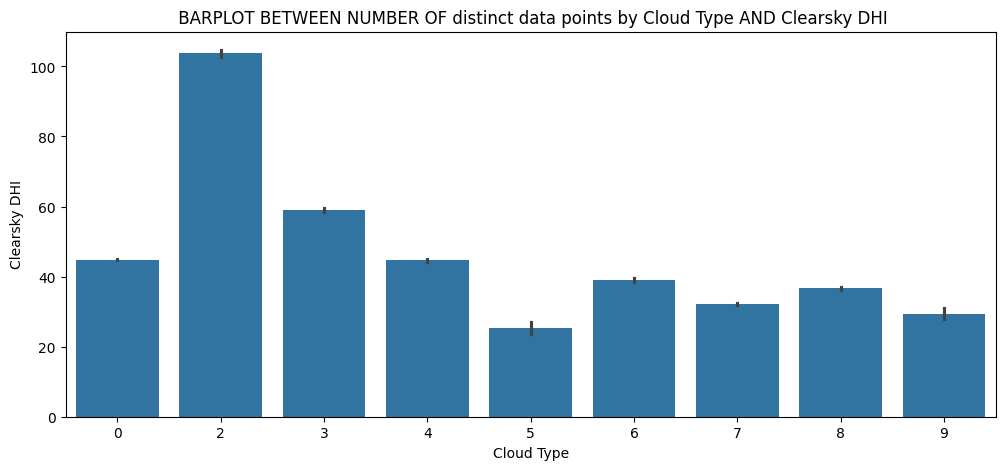

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='Cloud Type',y='Clearsky DHI',data=data)
plt.title(" BARPLOT BETWEEN NUMBER OF distinct data points by Cloud Type AND Clearsky DHI")

COUNTPLOT OF NUMBER OF Cloud Types

<ipython-input-61-20559ad45d01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='Cloud Type',palette='rainbow')


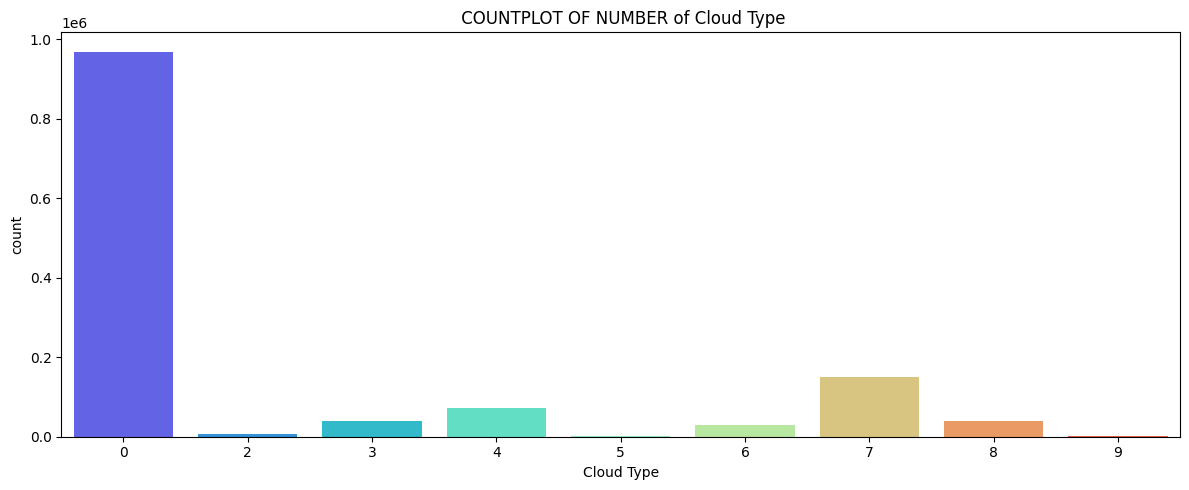

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='Cloud Type',palette='rainbow')
plt.title(" COUNTPLOT OF NUMBER of Cloud Type")
plt.tight_layout()
plt.savefig("countplot")

LINEAR MODEL PLOT BETWEEN Relative Humidity VERSUS Clearsky DHI, BASED ON Cloud Type

Text(0.5, 1.0, ' LINEAR MODEL PLOT BETWEEN Relative Humidity VERSUS Clearsky DHI, BASED ON Cloud Type')

<Figure size 2000x500 with 0 Axes>

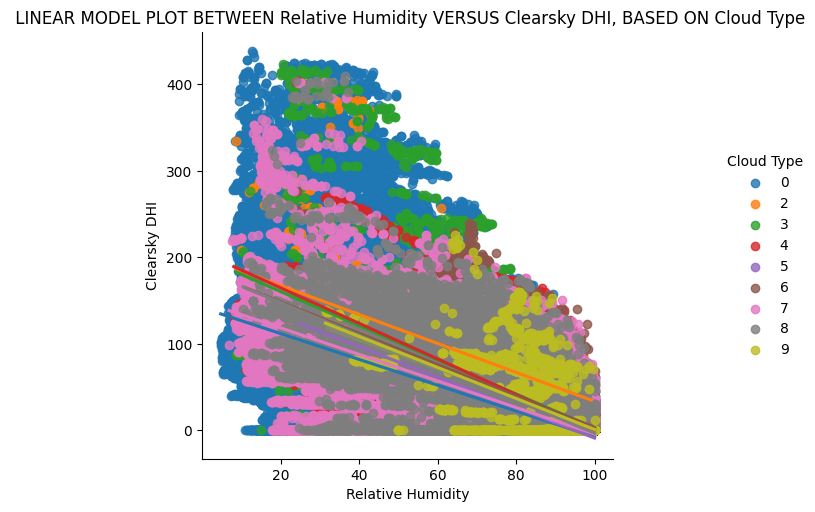

In [ ]:
plt.figure(figsize=(20,5))
sns.lmplot(x='Relative Humidity',y='Clearsky DHI',data=data,hue='Cloud Type')
plt.title(" LINEAR MODEL PLOT BETWEEN Relative Humidity VERSUS Clearsky DHI, BASED ON Cloud Type")
#plt.tight_layout()

LINEAR MODEL PLOT BETWEEN Pressure VERSUS Clearsky DHI, BASED ON Year

Text(0.5, 1.0, ' LINEAR MODEL PLOT BETWEEN Pressure VERSUS Clearsky DHI, BASED ON THE Year')

<Figure size 2000x500 with 0 Axes>

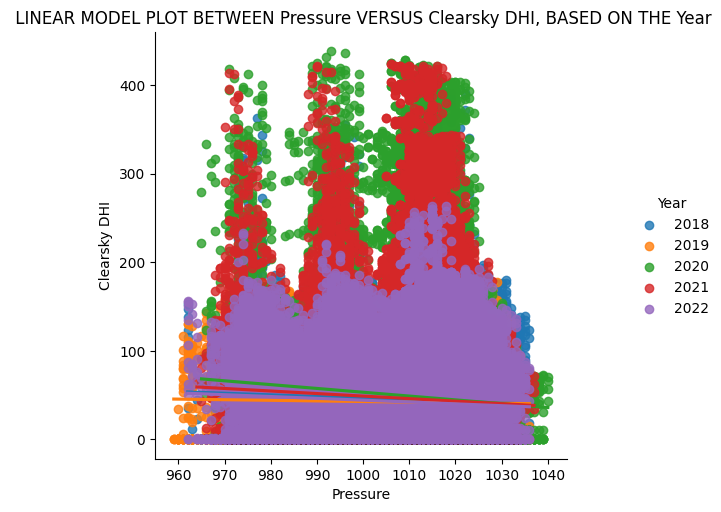

In [ ]:
plt.figure(figsize=(20,5))
sns.lmplot(x='Pressure',y='Clearsky DHI',data=solar_ir_df,hue='Year')
plt.title(" LINEAR MODEL PLOT BETWEEN Pressure VERSUS Clearsky DHI, BASED ON THE Year")
#plt.tight_layout()

BARPLOT OF Year VERSUS Clearsky DHI

Text(0.5, 1.0, 'BARPLOT OF Year VERSUS Clearsky DHI')

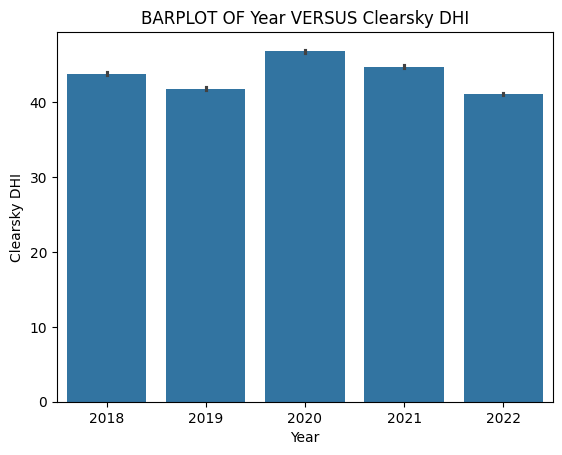

In [ ]:
sns.barplot(x='Year',y='Clearsky DHI',data=data)
plt.title("BARPLOT OF Year VERSUS Clearsky DHI")

BARPLOT OF Hour VERSUS Clearsky DHI

In [ ]:
sns.barplot(x='Hour',y='Clearsky DHI',data=datad)
plt.title("BARPLOT OF Hour VERSUS Clearsky DHI")

NameError: name 'datad' is not defined

## SUPERVISED LEARNING ALGORITHM - REGRESSION

In [ ]:
data.columns

In [ ]:
X = data[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Solar Zenith Angle',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'GHI', 'Relative Humidity', 'Pressure', 'Precipitable Water', 'Wind Speed', 'zipcode']]

In [ ]:
y=data['Clearsky DHI']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(Xtrain,ytrain)

In [ ]:
type(lm.coef_)

In [ ]:
y_predicted=lm.predict(Xtest)

NUMPY ARRAY OF PREDICTED Clearsky DHI

In [ ]:
y_predicted

PERFORMANCE EVALUATION USING MEAN AVERAGE ERROR, MEAN SQUARE ERROR AND ROOT MEAN SQUARE ERROR

In [ ]:
from sklearn import metrics
import numpy as np
print("MAE:", metrics.mean_absolute_error(ytest,y_predicted))
print("MSE:", metrics.mean_squared_error(ytest,y_predicted))
print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest,y_predicted)))
print(metrics.explained_variance_score(ytest,y_predicted))

NORMAL DISTRIBUTION OF ERROR (TEST Clearsky DHI - PREDICTED Clearsky DHI)

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot((ytest-y_predicted),bins=50,hist_kws=dict(edgecolor="k", linewidth=2));
plt.xlabel("Clearsky DHI")
plt.title("NORMAL DISTRIBUTION OF ERROR (TEST Clearsky DHI)- PREDICTED (Clearsky DHI)")

SCATTER PLOT TO COMPARE THE RELATIONSHIP BETWEEN TEST DATA AND PREDICTED DATA

In [ ]:
import matplotlib.pyplot as plt

print(ytest.shape, y_predicted.shape)
print(data.shape)


plt.figure(figsize=(10, 10))
plt.scatter(x=ytest, y=y_predicted, edgecolors='black')
plt.xlabel("TEST Clearsky DHI")
plt.ylabel("PREDICTED Clearsky DHI")
plt.title("SCATTER PLOT TO COMPARE THE RELATIONSHIP BETWEEN TEST DATA AND PREDICTED DATA")
plt.show()

LINEAR REGRESSION CURVE

In [ ]:
plt.figure(figsize=(25, 5))

sns.regplot(x=ytest, y=y_predicted, color='purple')


plt.xlabel("TEST Clearsky DHI")
plt.ylabel("PREDICTED Clearsky DHI")
plt.title("LINEAR REGRESSION CURVE")

plt.show()